# Preparation

In [1]:
import os
import json

# Sweep values (from your script)
dropout_options = [0.0, 0.1, 0.2, 0.3]
weight_decay_options = [0.0, 0.001, 0.01, 0.1]
model_options = ["andrii0", "roshnipm_pair_nocommon"]

# Directory pattern (adjust if your actual run dir format is different)
def get_run_dir(model, wd, dr):
    return f"runs/data/{model}_wd{wd}_dr{dr}_r{model}_dropout{dr}_wd{wd}"

In [2]:
results = {}

for wd in weight_decay_options:
    for dr in dropout_options:
        for model in model_options:
            run_dir = get_run_dir(model, wd, dr)
            stats_path = os.path.join(run_dir, "training_statistics.json")
            if os.path.exists(stats_path):
                with open(stats_path, "r") as f:
                    stats = json.load(f)
                results[(wd, dr, model)] = stats
            else:
                print(f"Missing: {stats_path}")

# Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt

final_test_losses = np.full((len(weight_decay_options), len(dropout_options), len(model_options)), np.nan)
test_losses = {}

for i, wd in enumerate(weight_decay_options):
    for j, dr in enumerate(dropout_options):
        for k, model in enumerate(model_options):
            stats = results.get((wd, dr, model))
            if stats:
                test_losses[(wd, dr, model)] = [entry['test_loss'] for entry in stats if 'test_loss' in entry]
                if test_losses[(wd, dr, model)]:
                    final_test_losses[i, j, k] = test_losses[(wd, dr, model)][-1]
                    if len(test_losses[(wd, dr, model)]) < 100:
                        print(f"Warning: {len(test_losses[(wd, dr, model)])} test losses for (wd={wd}, dr={dr}, model={model})")

## andrii0

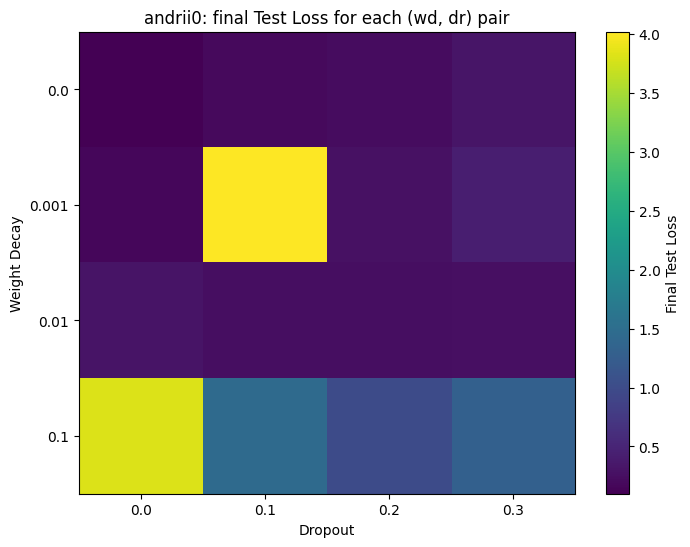

In [4]:
plt.figure(figsize=(8, 6))
plt.imshow(final_test_losses[:,:,0], cmap='viridis', aspect='auto')
plt.colorbar(label='Final Test Loss')
plt.xticks(range(len(dropout_options)), dropout_options)
plt.yticks(range(len(weight_decay_options)), weight_decay_options)
plt.xlabel('Dropout')
plt.ylabel('Weight Decay')
plt.title('andrii0: final Test Loss for each (wd, dr) pair')
plt.show()

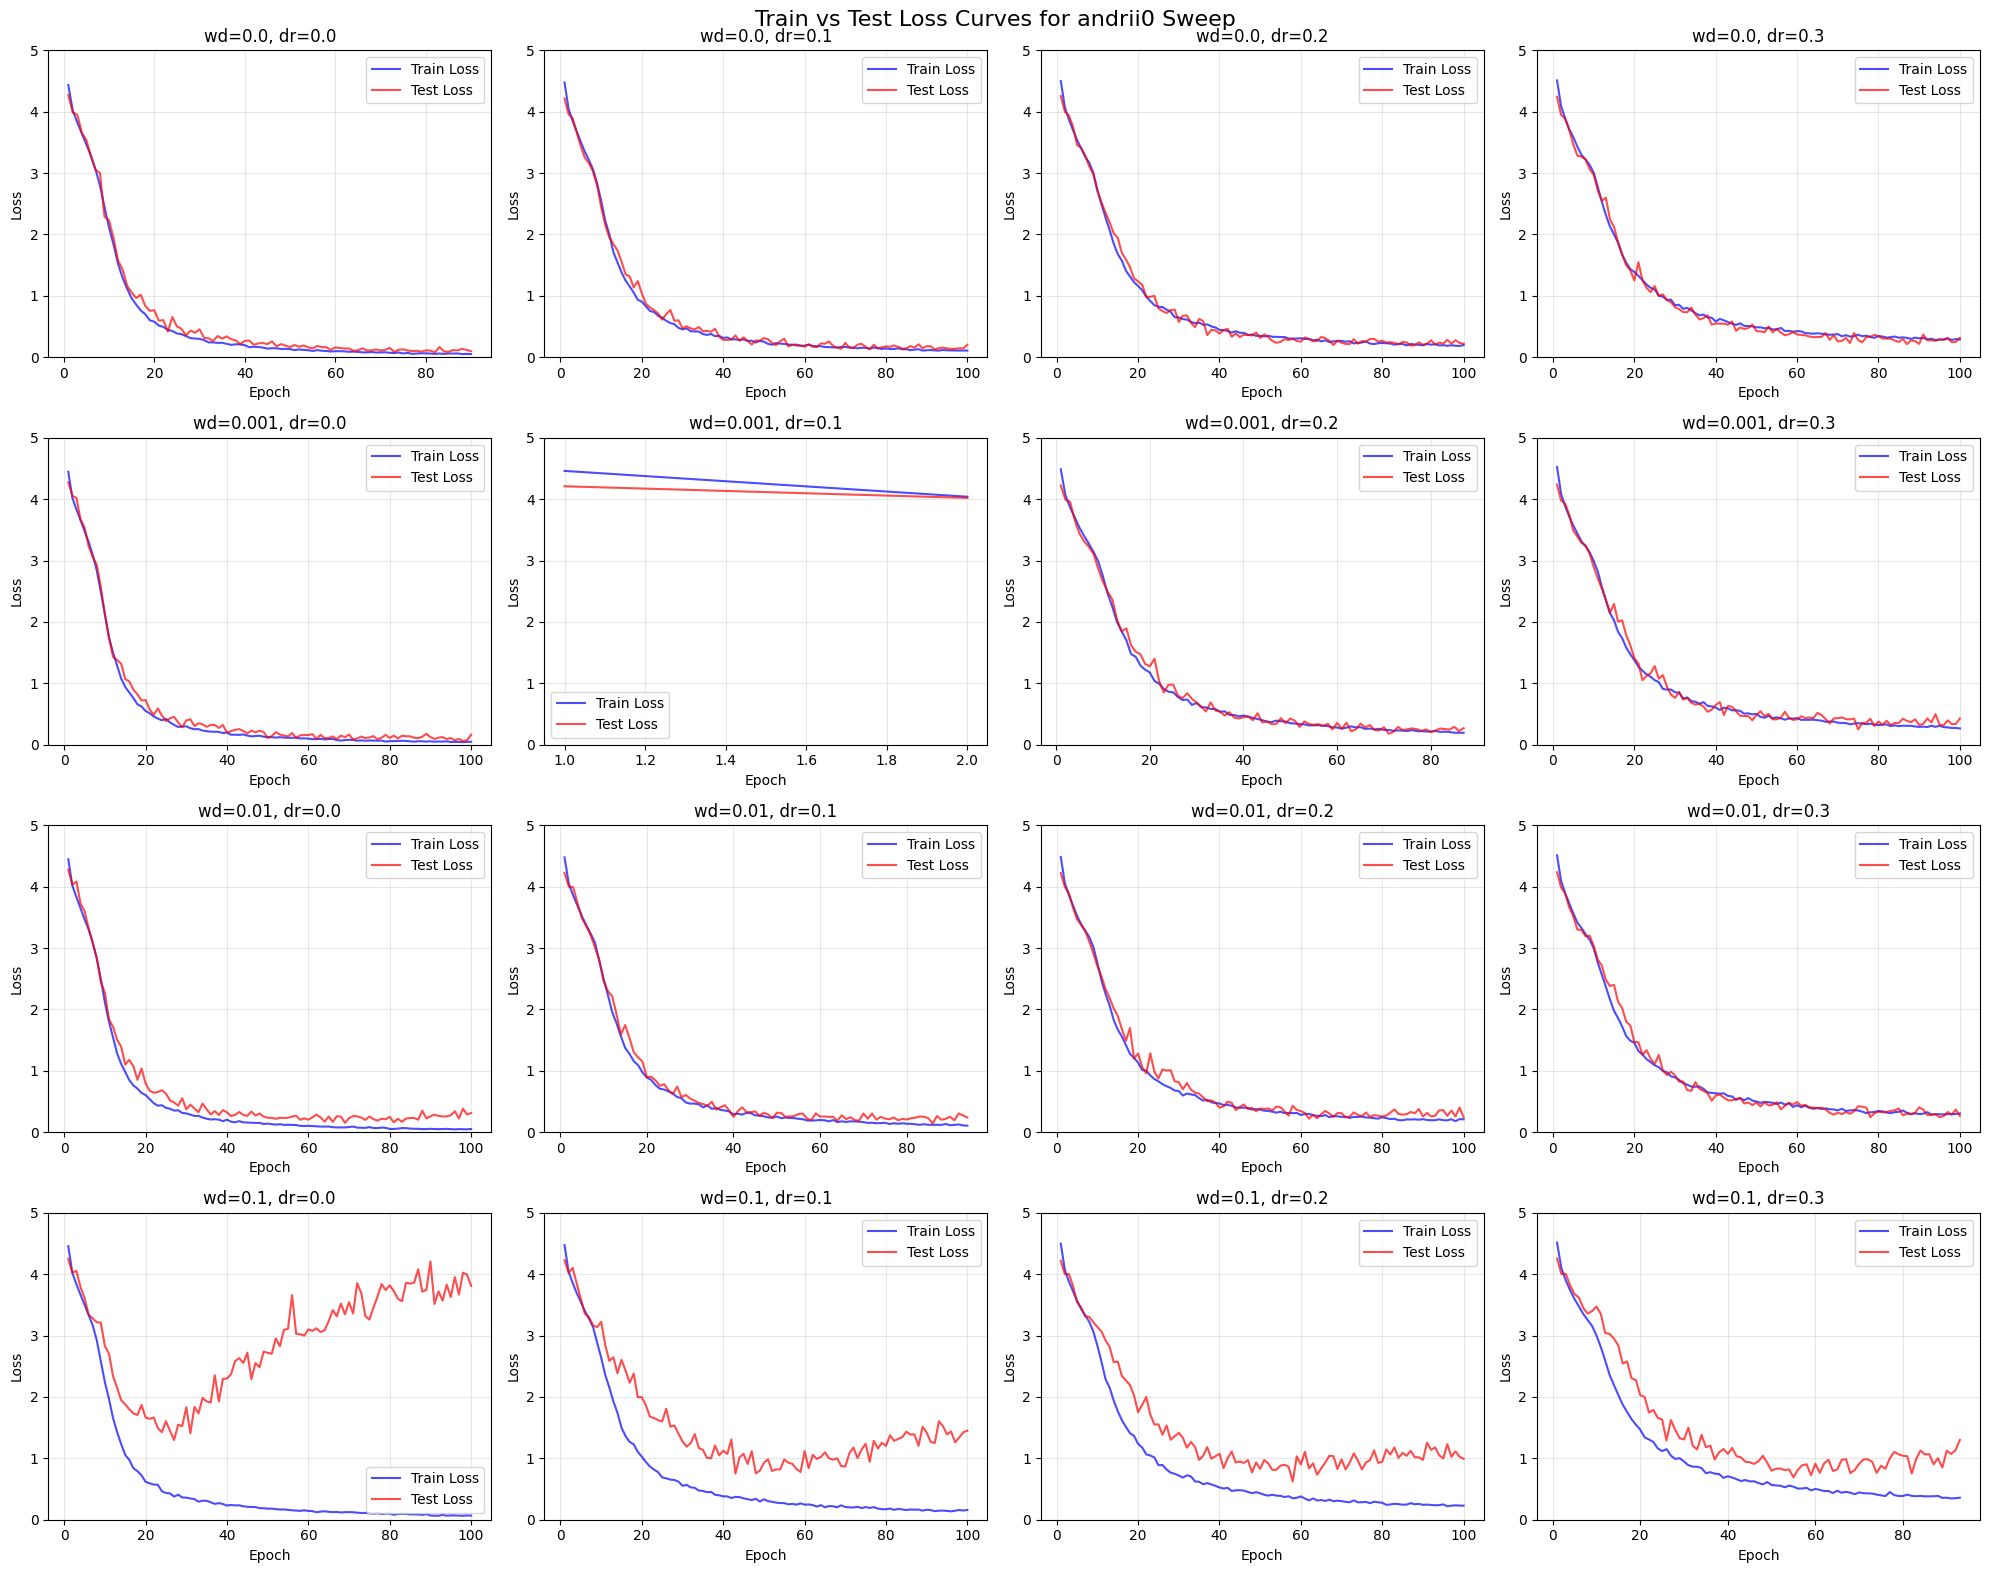

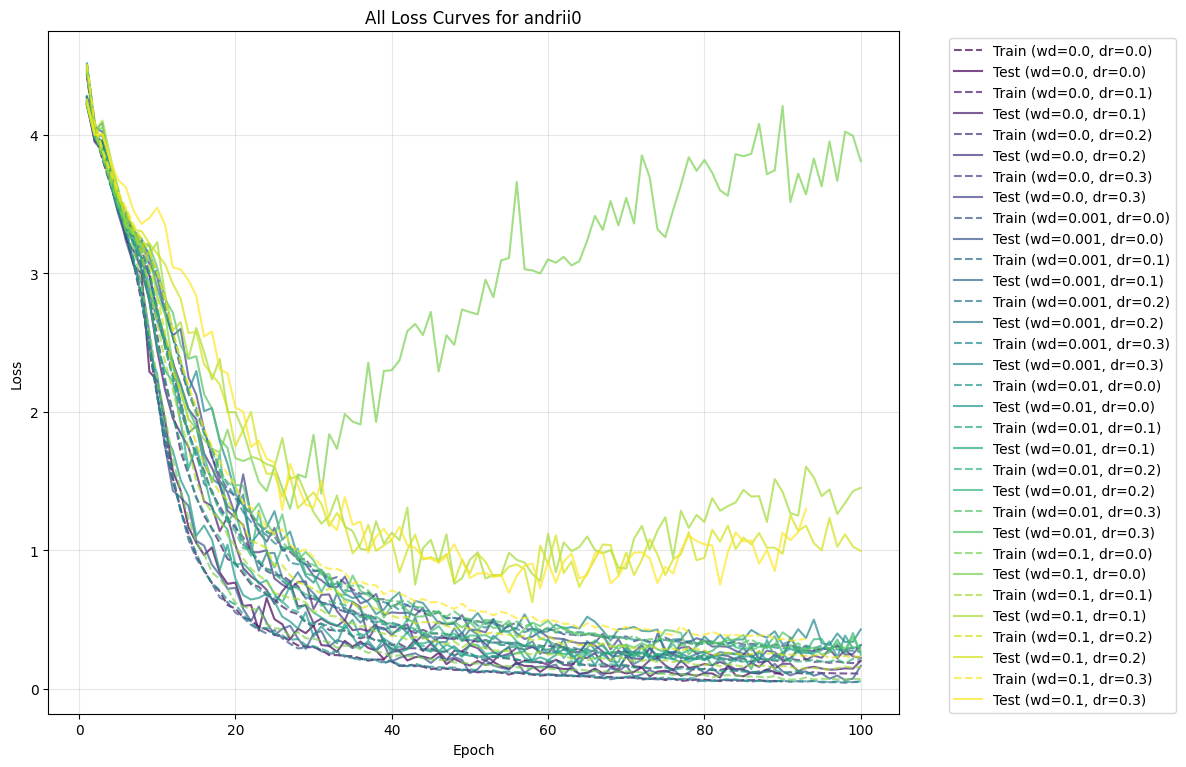

In [5]:
from analyses.roshnipm.sweep_plotting_code import plot_sweep_loss_curves, plot_overlayed_curves

# For subplot grid
plot_sweep_loss_curves(results, "andrii0", weight_decay_options, dropout_options)

# For overlayed curves
plot_overlayed_curves(results, "andrii0", weight_decay_options, dropout_options)

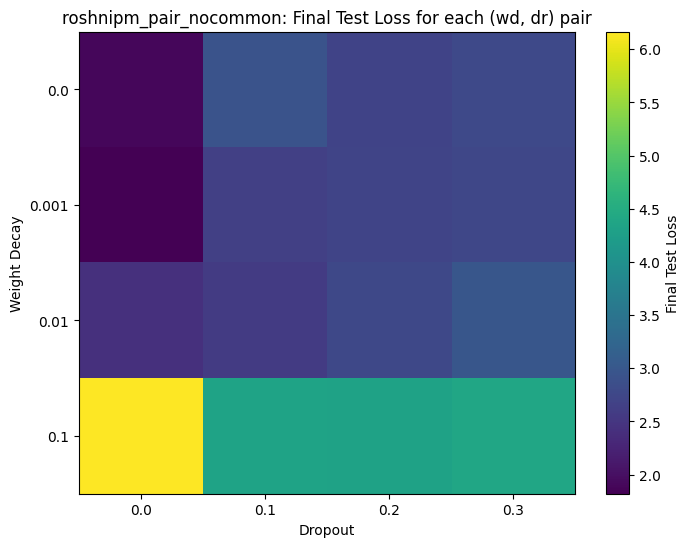

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(final_test_losses[:,:,1], cmap='viridis', aspect='auto')
plt.colorbar(label='Final Test Loss')
plt.xticks(range(len(dropout_options)), dropout_options)
plt.yticks(range(len(weight_decay_options)), weight_decay_options)
plt.xlabel('Dropout')
plt.ylabel('Weight Decay')
plt.title('roshnipm_pair_nocommon: Final Test Loss for each (wd, dr) pair')
plt.show()

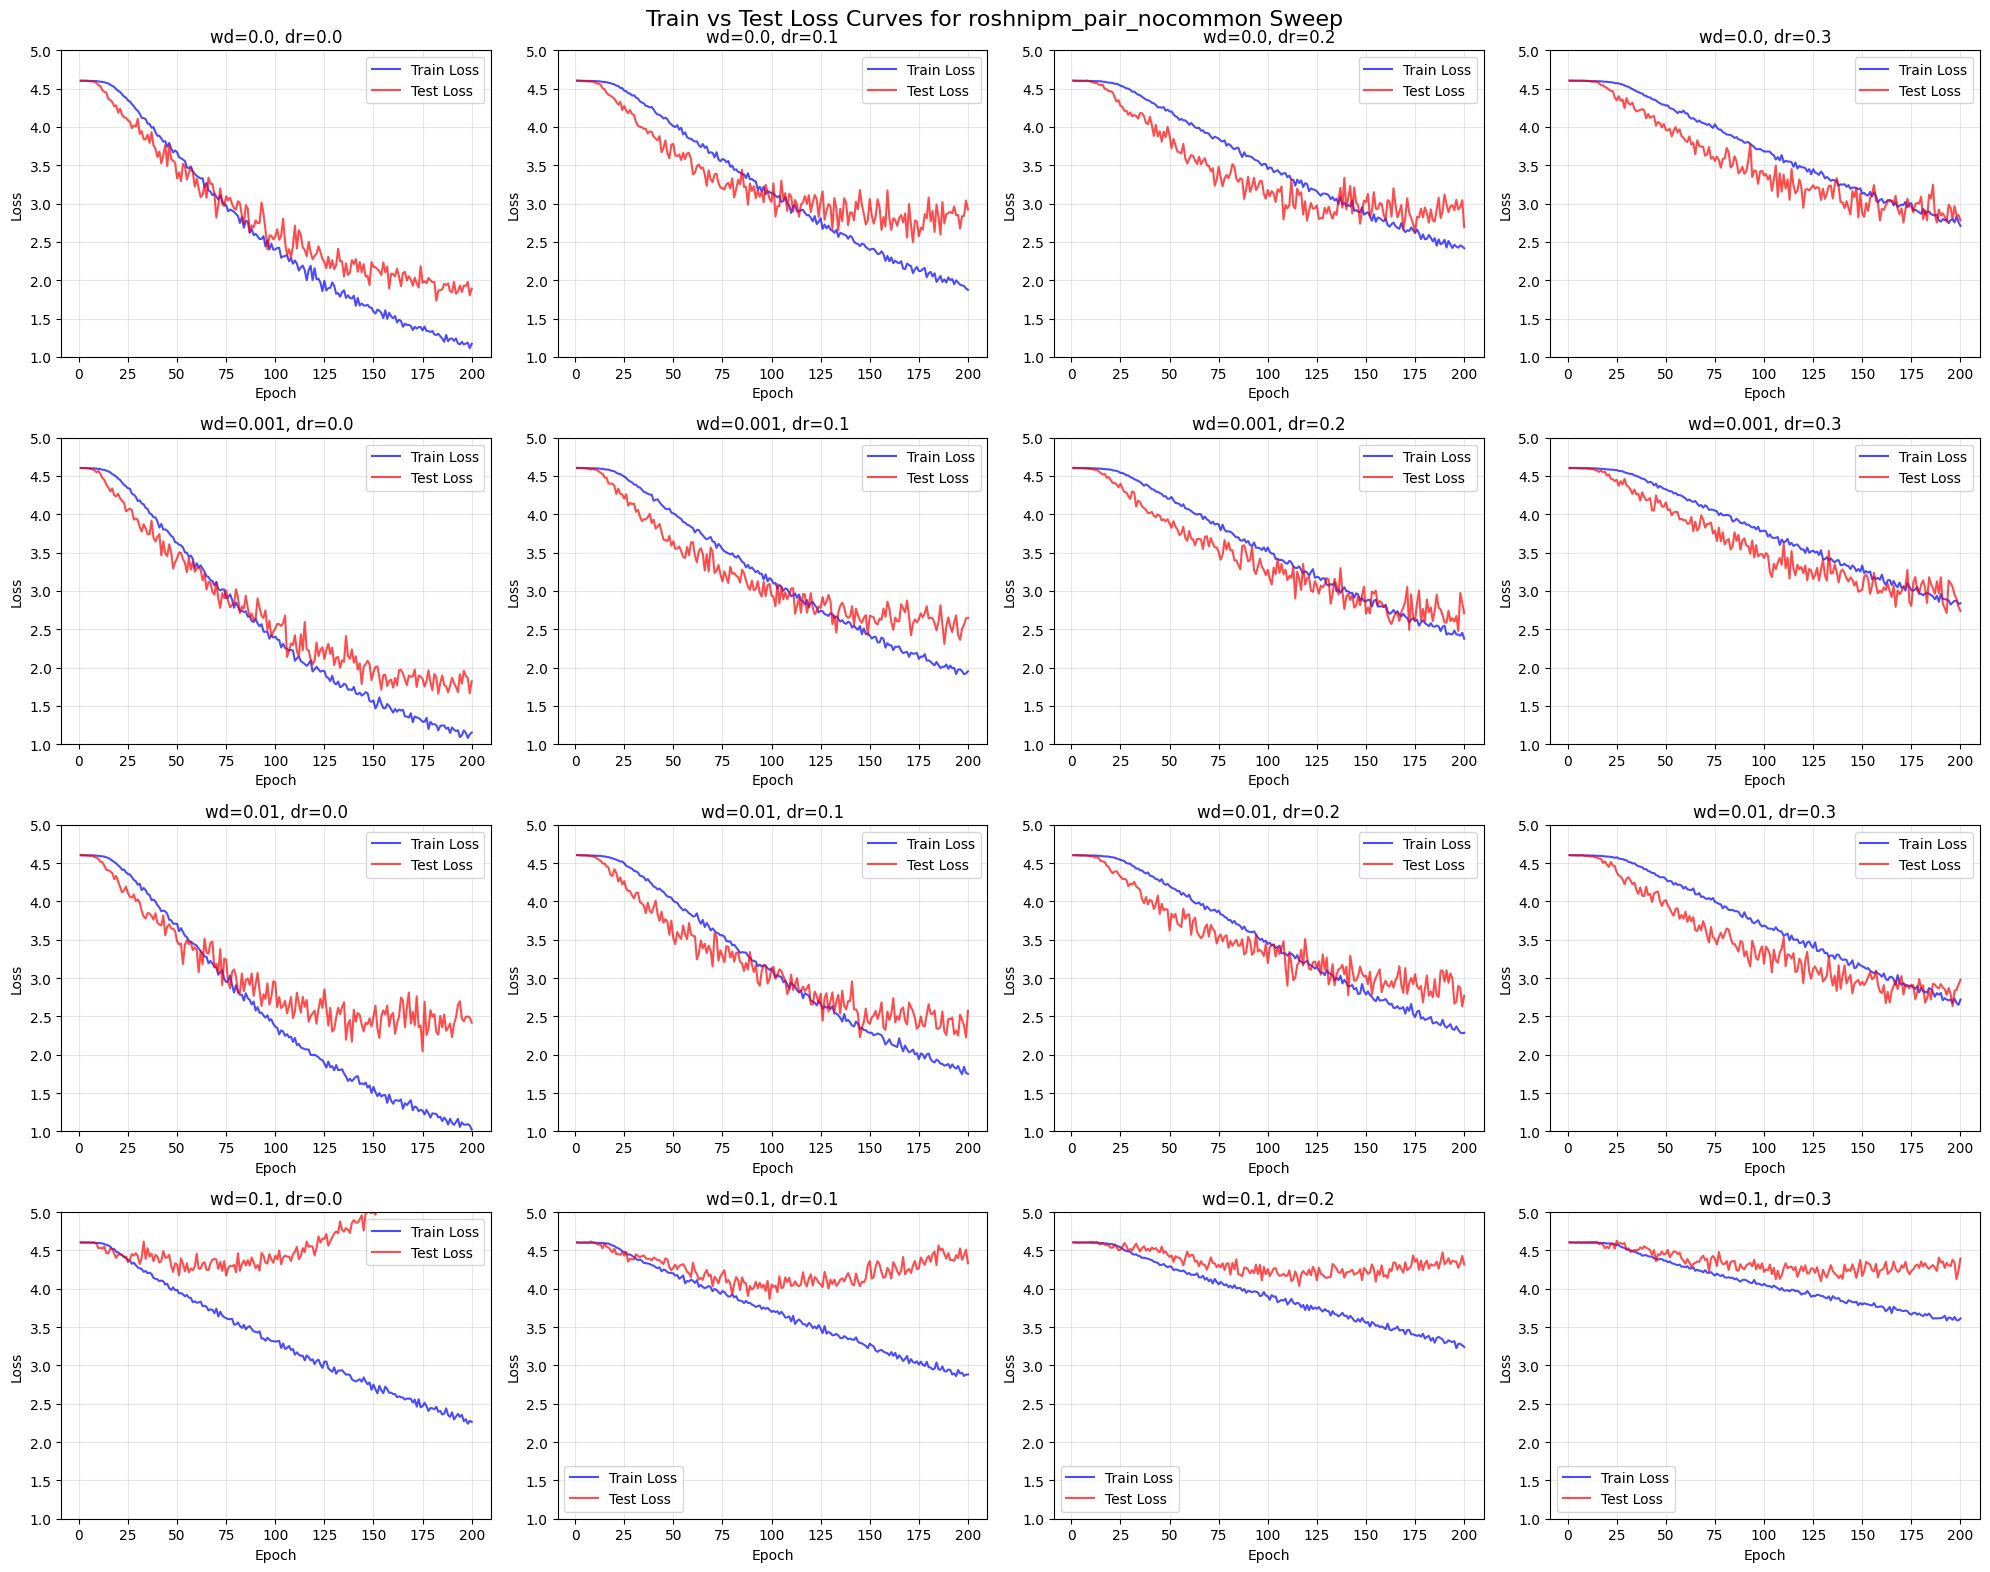

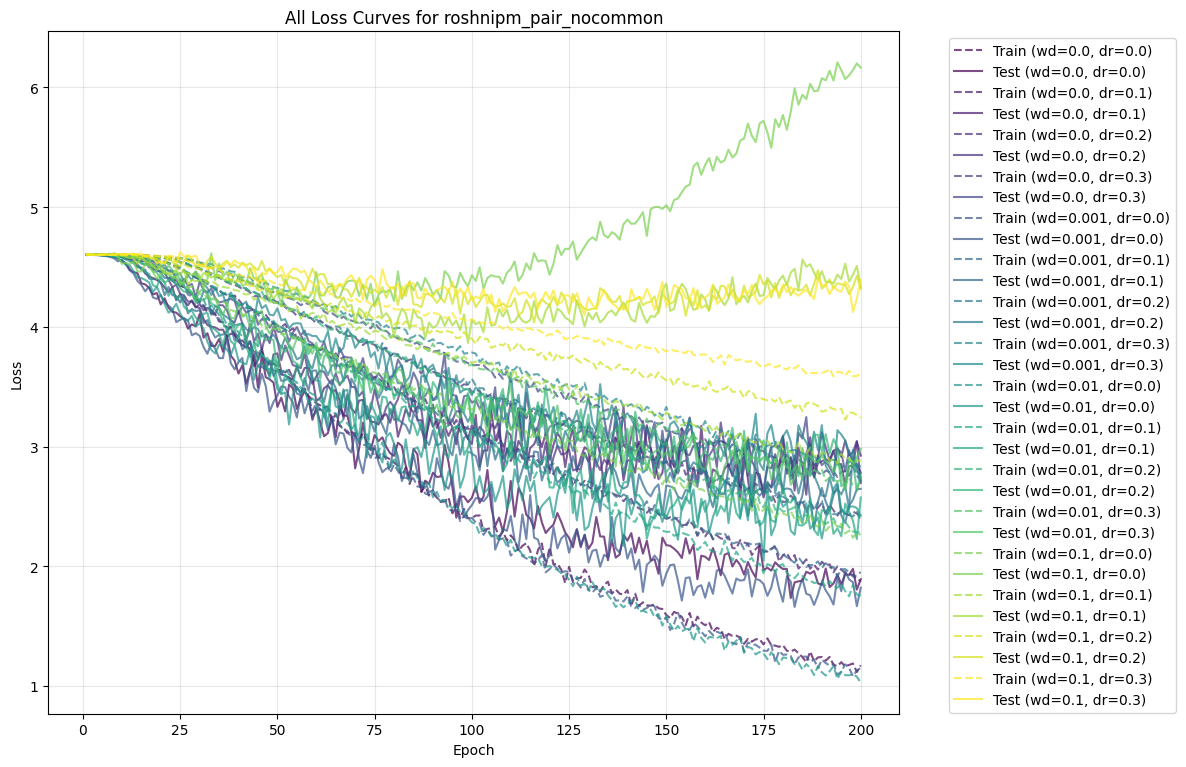

In [7]:
from analyses.roshnipm.sweep_plotting_code import plot_sweep_loss_curves, plot_overlayed_curves

# For subplot grid
plot_sweep_loss_curves(results, "roshnipm_pair_nocommon", weight_decay_options, dropout_options, y1=1)

# For overlayed curves
plot_overlayed_curves(results, "roshnipm_pair_nocommon", weight_decay_options, dropout_options)



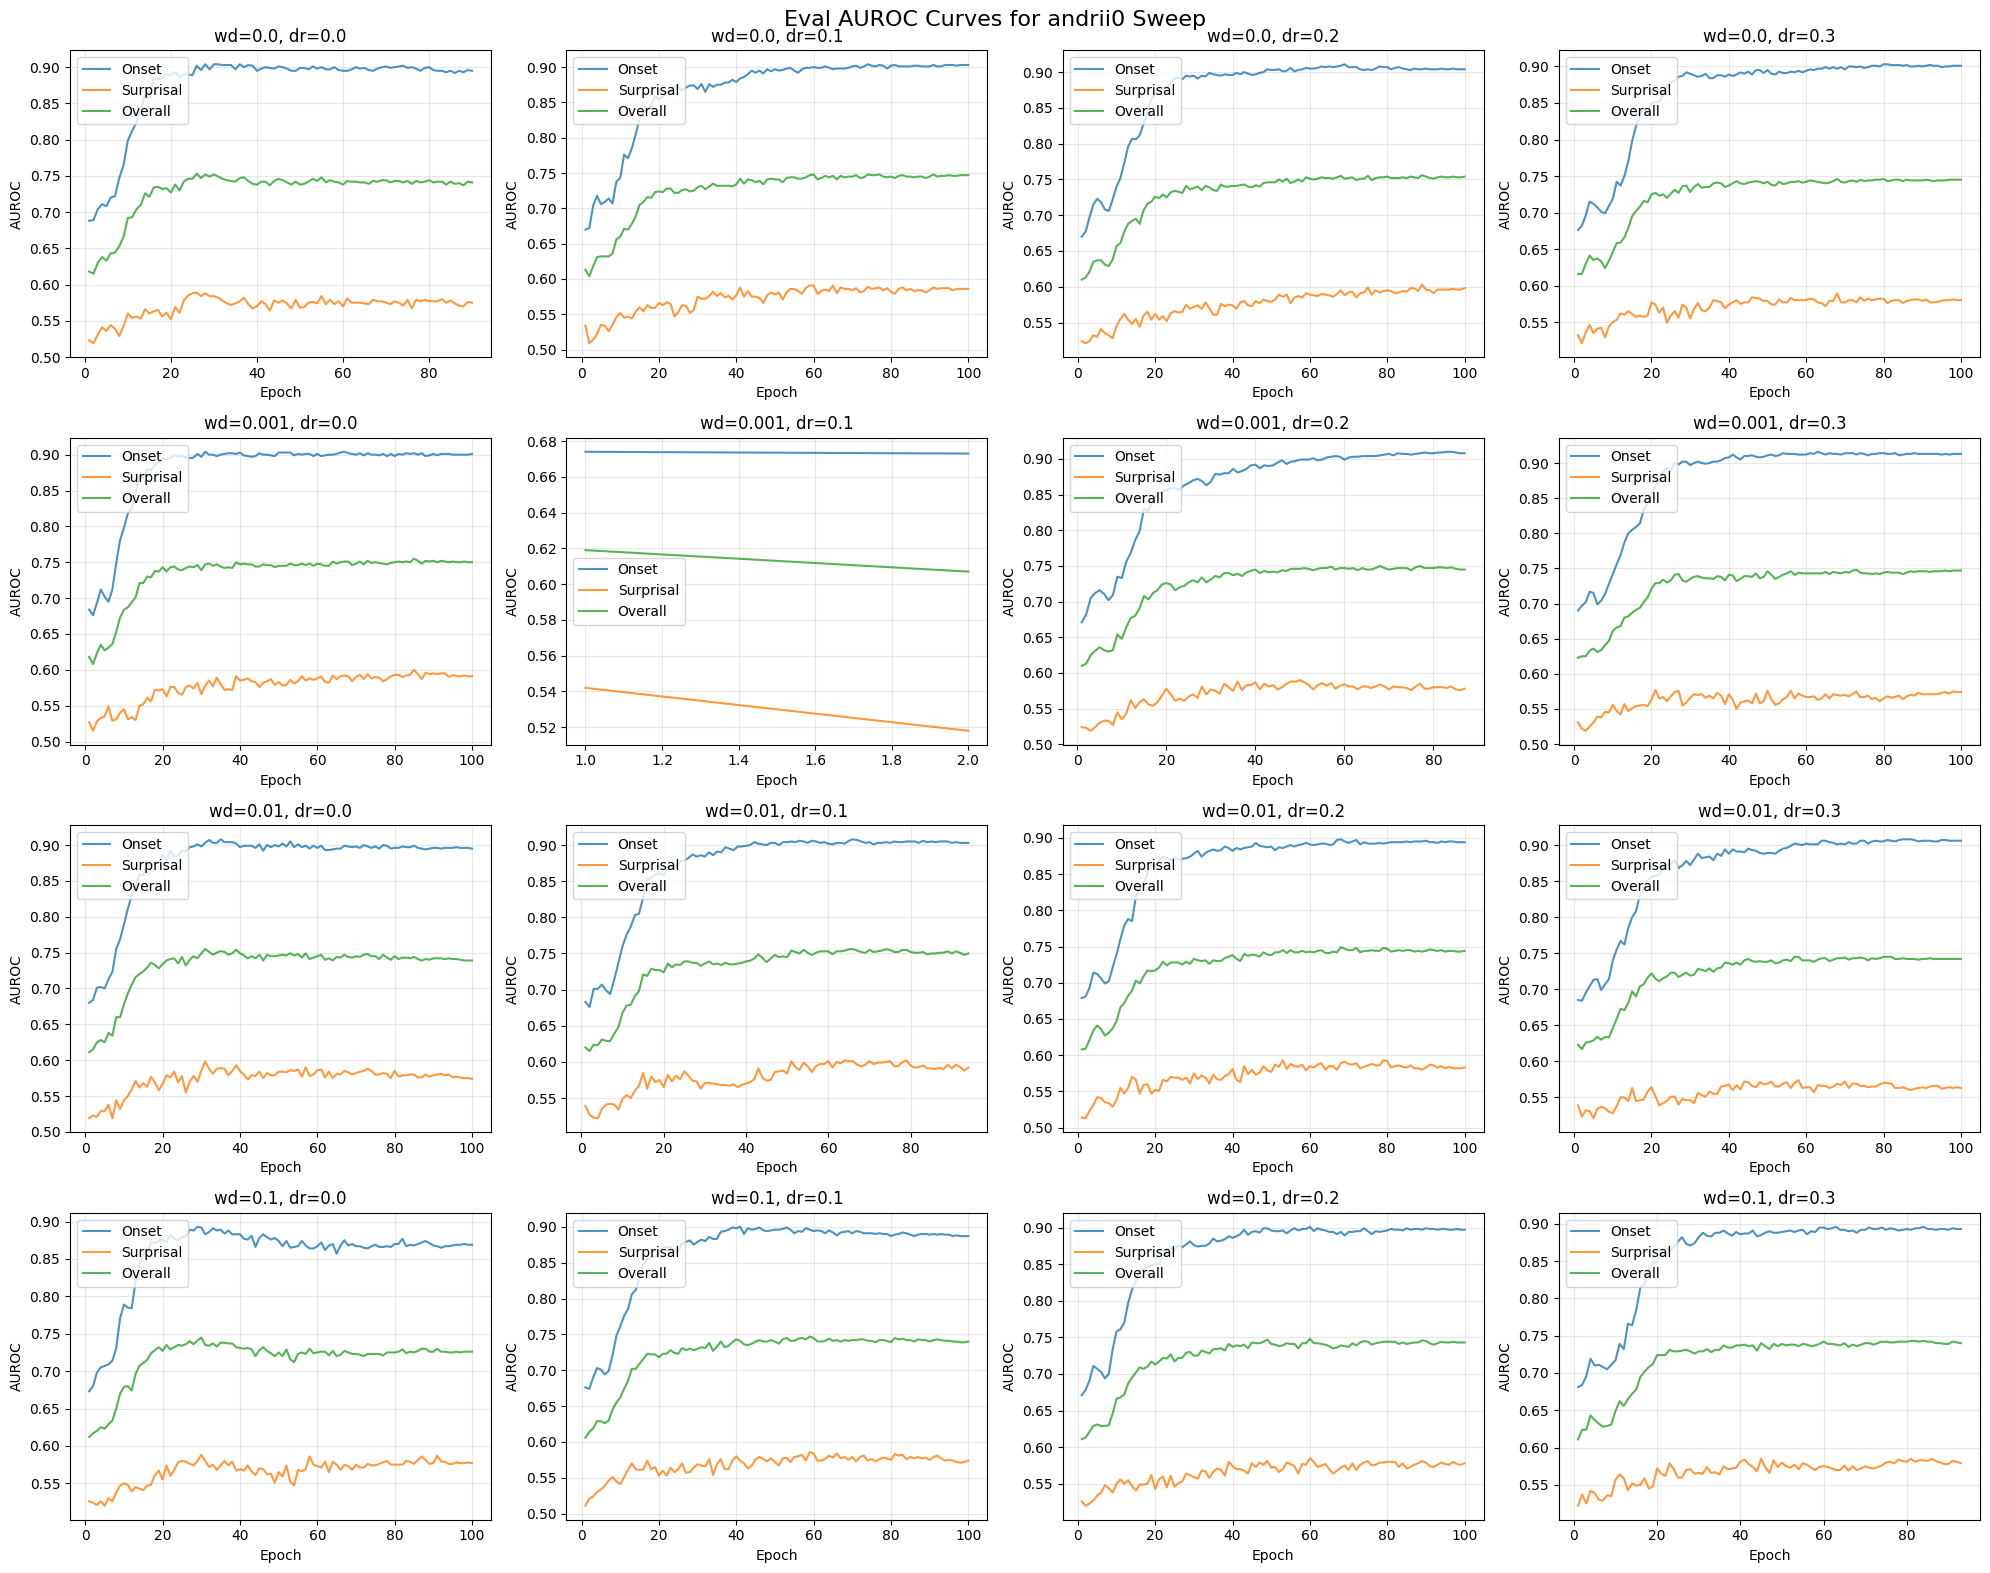

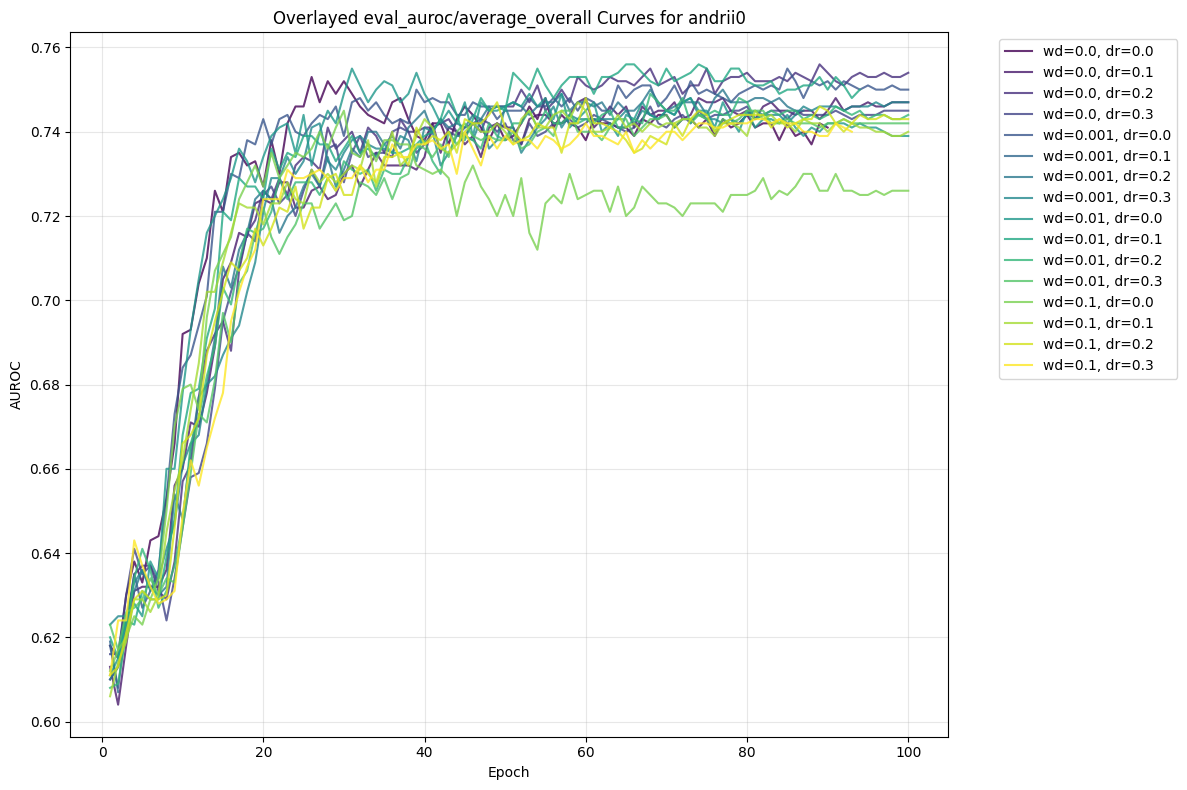

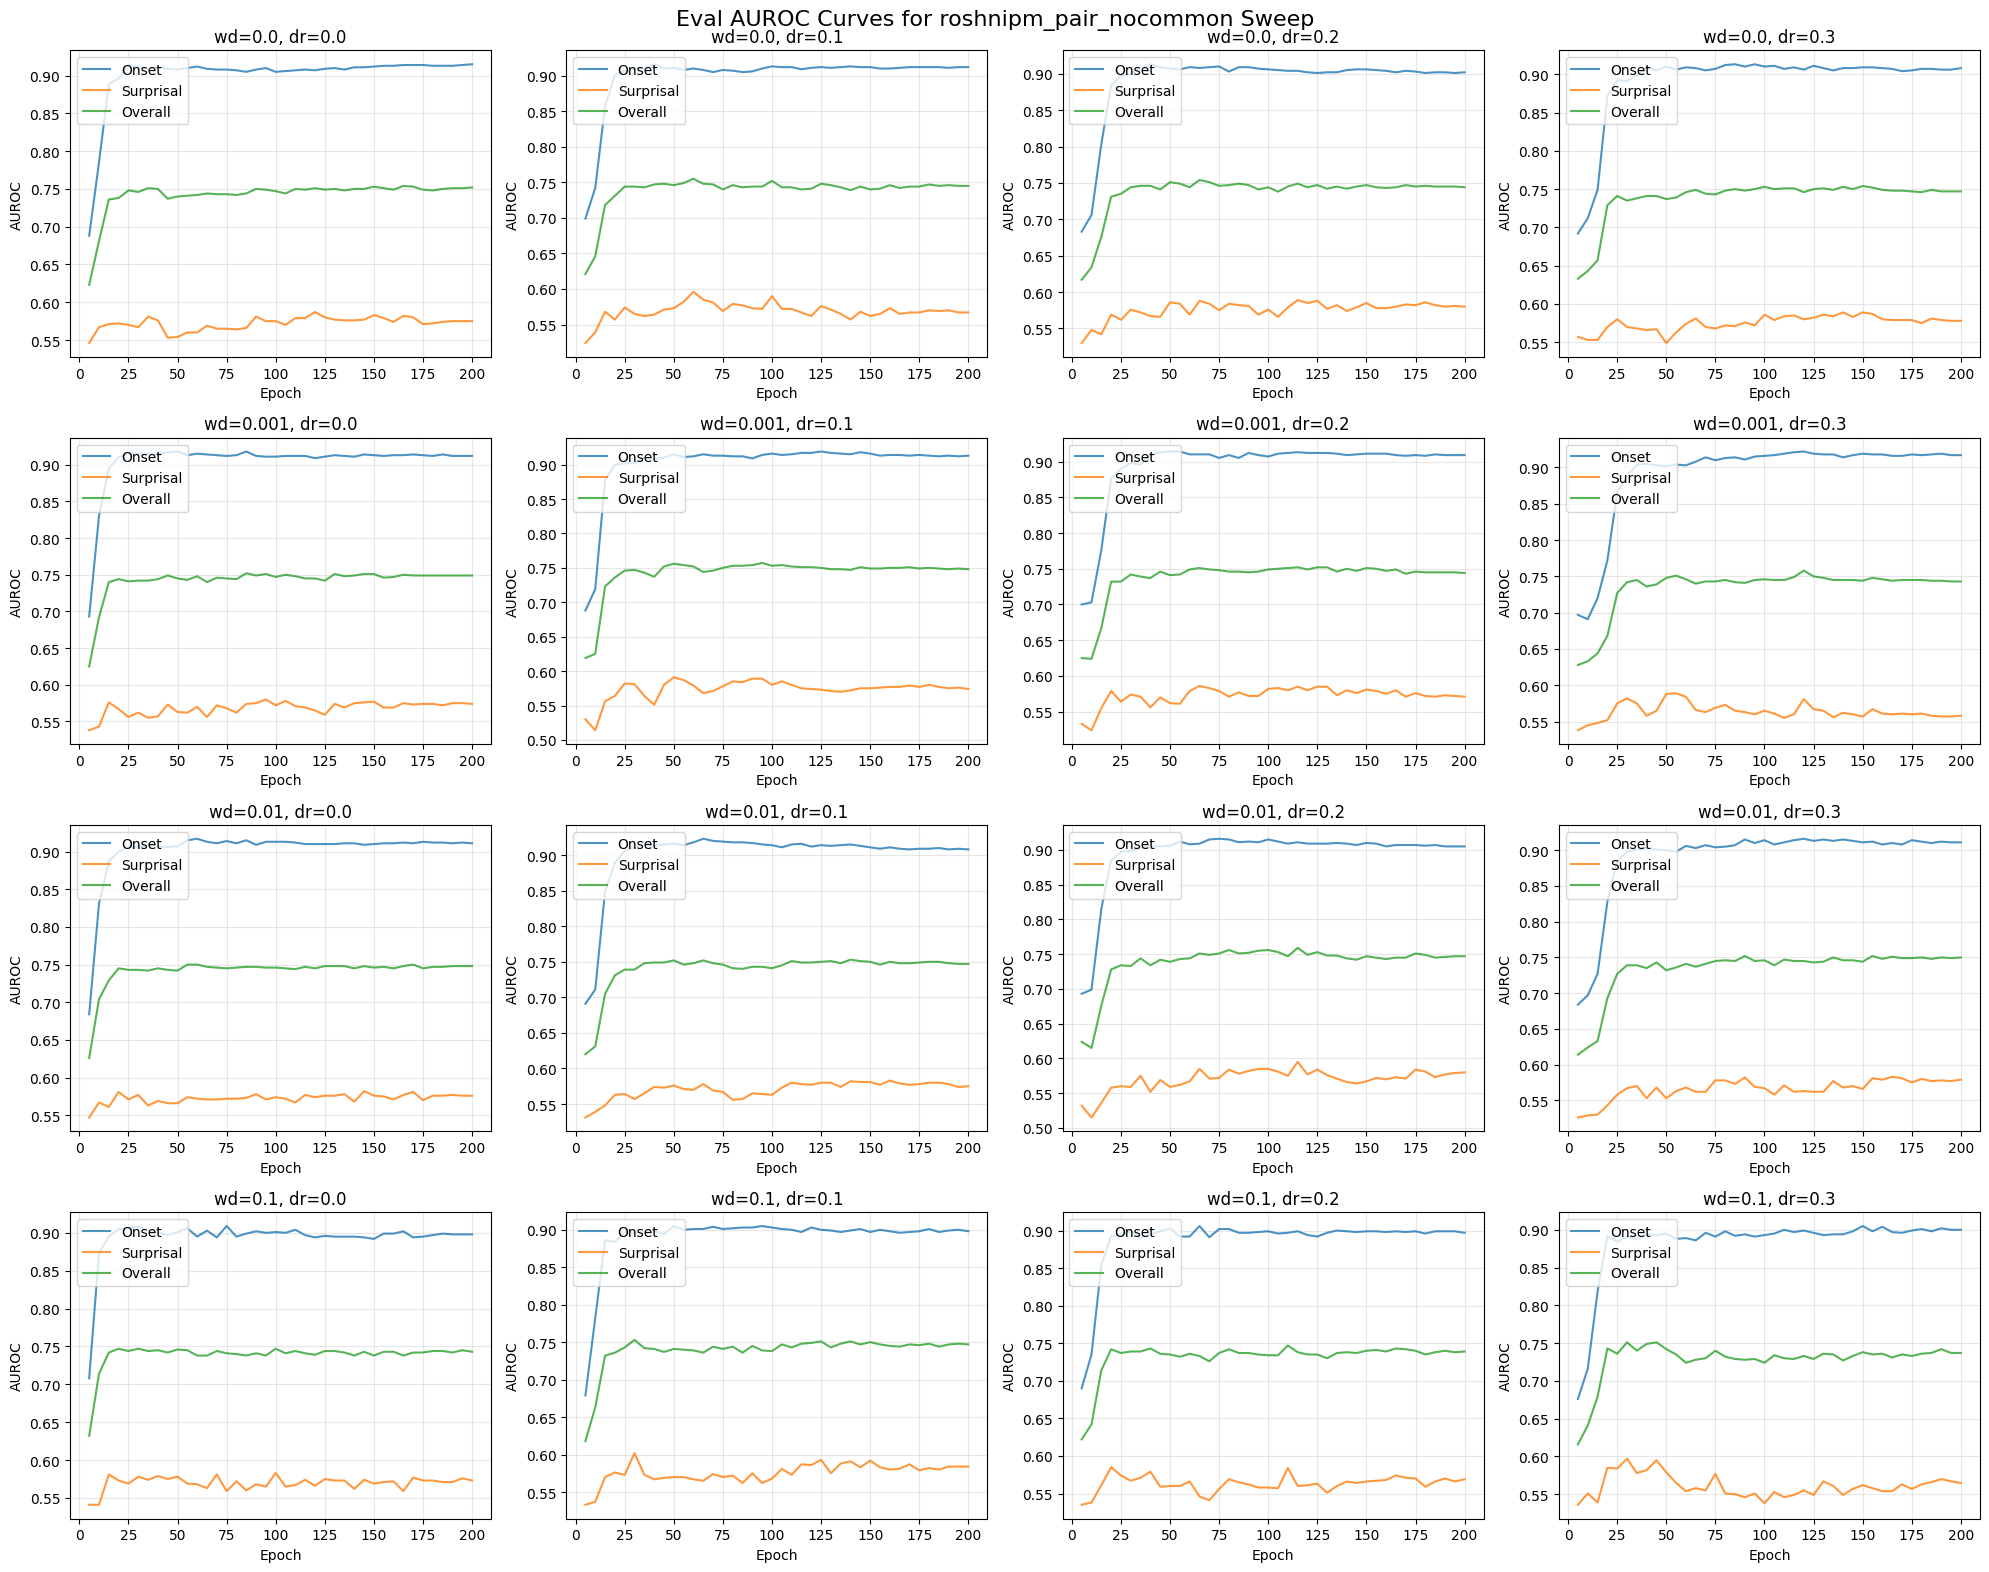

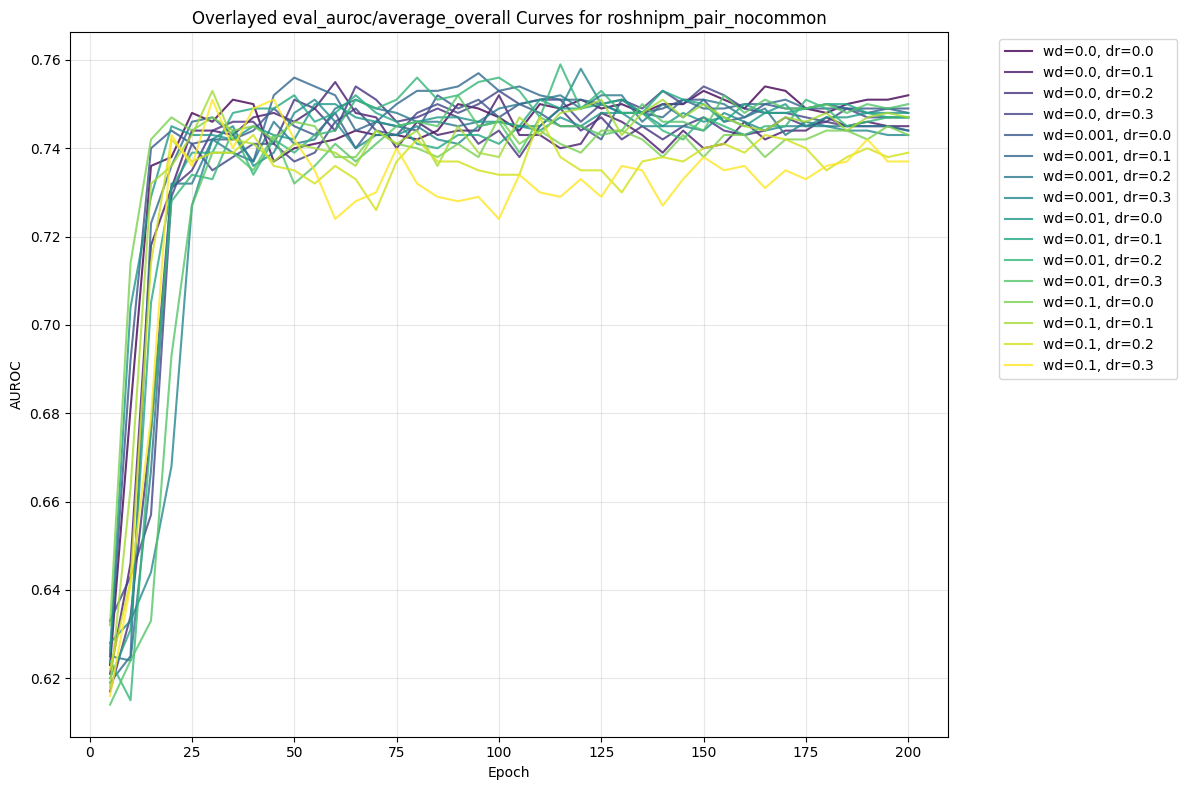

In [8]:
from analyses.roshnipm.sweep_plotting_code import plot_sweep_eval_curves, plot_overlayed_eval_curves

plot_sweep_eval_curves(results, "andrii0", weight_decay_options, dropout_options)
plot_overlayed_eval_curves(results, "andrii0", weight_decay_options, dropout_options, eval_key='eval_auroc/average_overall')

plot_sweep_eval_curves(results, "roshnipm_pair_nocommon", weight_decay_options, dropout_options)
plot_overlayed_eval_curves(results, "roshnipm_pair_nocommon", weight_decay_options, dropout_options, eval_key='eval_auroc/average_overall')